In [5]:
# ## Superstore Sales Analysis
# This notebook analyzes the Superstore Sales Dataset to derive business-relevant insights.
# The dataset is sourced from: [Superstore Sales Dataset on Kaggle](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting).

In [6]:
# ### Import Libraries
# Import required libraries for data manipulation and analysis
import pandas as pd
import numpy as np

In [7]:
# ### Load Dataset
# Load the Superstore dataset using the provided file path
data = pd.read_csv(r'C:\Users\Roxana\Desktop\Data_Analytics\Github_Portfolio\repo_superstore_sales\superstore-sales-raw-data\superstore_raw.csv')

In [8]:
# ### Initial Data Exploration
# Display basic information to understand the dataset structure

In [9]:
# Display first 5 rows of the dataset
print("### First 5 rows of the dataset ###")
print(data.head())

### First 5 rows of the dataset ###
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code

In [10]:
# Display column names and data types
print("\n### Column names and data types ###")
print(data.dtypes)


### Column names and data types ###
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [11]:
# Display dataset summary
print("\n### Dataset summary ###")
print(data.info())


### Dataset summary ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-nul

In [12]:
# Check for missing values
print("\n### Missing values per column ###")
print(data.isnull().sum())


### Missing values per column ###
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [13]:
# ## Data Cleaning

In [14]:
# ### Step 1: Convert date columns to datetime
# Convert 'Order Date' and 'Ship Date' to datetime format to enable time-based analysis
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

In [15]:
# ### Step 2: Handle missing values
# Remove rows with missing 'Postal Code' values (11 rows, ~0.11% of the dataset)
data = data.dropna(subset=['Postal Code'])

In [16]:
# ### Step 3: Convert Postal Code to string
# Convert 'Postal Code' to string to preserve leading zeros and treat as categorical
data['Postal Code'] = data['Postal Code'].astype(str)

In [17]:
# ### Step 4: Check for outliers in numerical columns
# Display summary statistics to identify potential outliers in numerical columns
print("\n### Summary statistics of numerical columns ###")
print(data.describe())


### Summary statistics of numerical columns ###
            Row ID                     Order Date  \
count  9789.000000                           9789   
mean   4896.705588  2017-05-01 02:51:57.866993664   
min       1.000000            2015-01-03 00:00:00   
25%    2449.000000            2016-05-23 00:00:00   
50%    4896.000000            2017-06-26 00:00:00   
75%    7344.000000            2018-05-15 00:00:00   
max    9800.000000            2018-12-30 00:00:00   
std    2827.486899                            NaN   

                           Ship Date         Sales  
count                           9789   9789.000000  
mean   2017-05-05 01:56:03.898253056    230.116193  
min              2015-01-07 00:00:00      0.444000  
25%              2016-05-27 00:00:00     17.248000  
50%              2017-06-29 00:00:00     54.384000  
75%              2018-05-19 00:00:00    210.392000  
max              2019-01-05 00:00:00  22638.480000  
std                              NaN    625.30207

In [18]:
# ### Step 5: Verify data types after cleaning
print("\n### Updated column data types ###")
print(data.dtypes)


### Updated column data types ###
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [19]:
# ### Step 6: Save cleaned dataset
# Save the cleaned dataset for further analysis
data.to_csv('superstore_cleaned.csv', index=False)
print("\n### Data cleaning completed ###")
print("Cleaned dataset saved as 'superstore_cleaned2.csv'.")


### Data cleaning completed ###
Cleaned dataset saved as 'superstore_cleaned2.csv'.


In [20]:
# ## Exploratory Data Analysis (EDA)
# This section explores the Superstore dataset to identify patterns, distributions, and potential outliers.

In [21]:
# ### Import Visualization Libraries
# Import libraries for creating plots
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Set plot style for better visuals
sns.set_style("whitegrid")

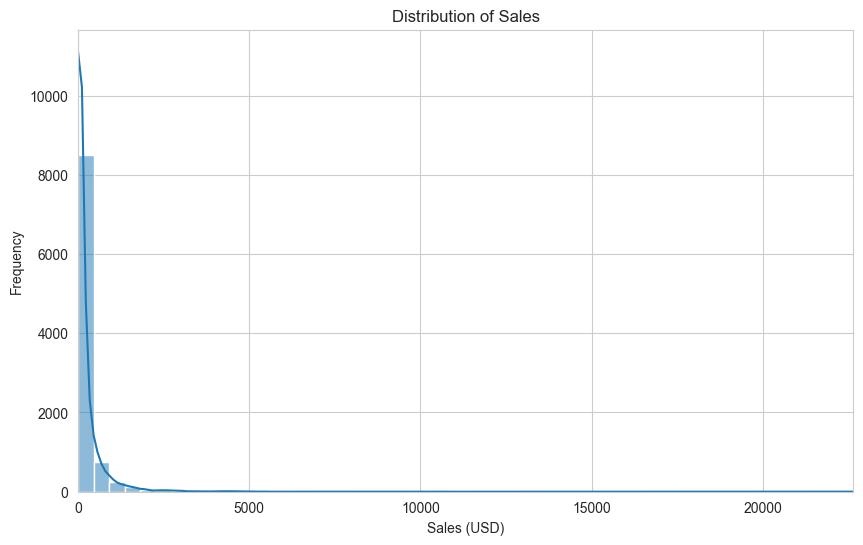

In [23]:
# ### 1. Distribution of Numerical Variables
# Analyze the distribution of 'Sales' to understand its range and identify outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales (USD)')
plt.ylabel('Frequency')
plt.xlim(0, data['Sales'].max())  # Set x-axis to start at 0
plt.show()

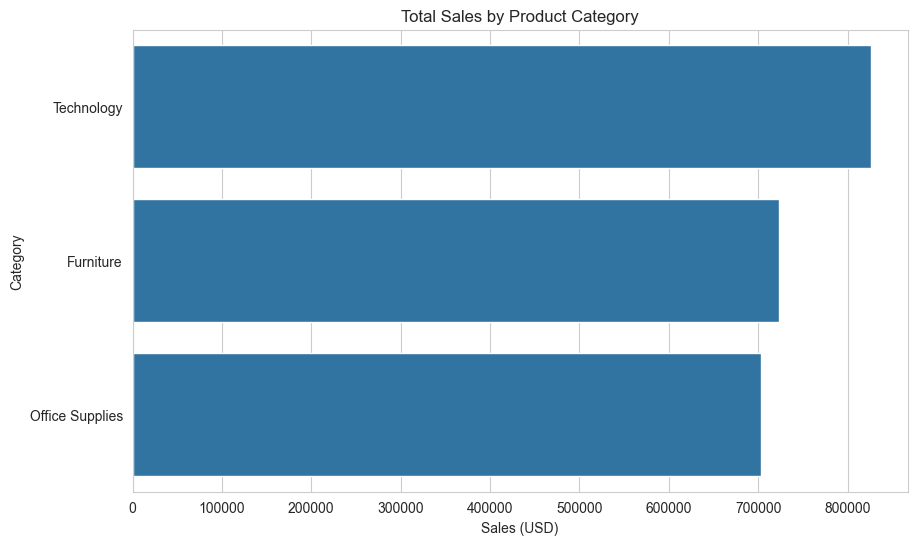

In [24]:
# ### 2. Sales by Product Category
# Aggregate and visualize total sales by product category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Category', data=sales_by_category.sort_values('Sales', ascending=False))
plt.title('Total Sales by Product Category')
plt.xlabel('Sales (USD)')
plt.ylabel('Category')
plt.show()

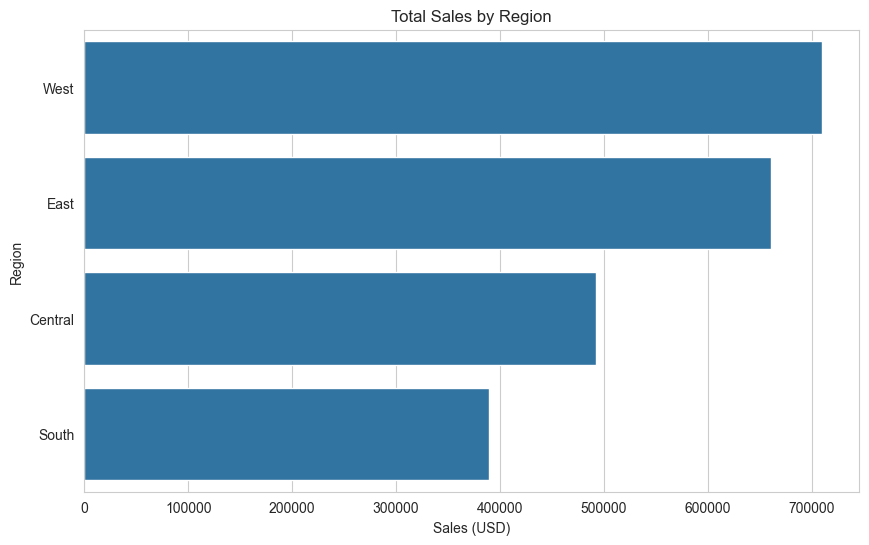

In [25]:
# ### 3. Sales by Region
# Aggregate and visualize total sales by region
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Region', data=sales_by_region.sort_values('Sales', ascending=False))
plt.title('Total Sales by Region')
plt.xlabel('Sales (USD)')
plt.ylabel('Region')
plt.show()

In [26]:
# ### 4. Sales Trend Over Time
# Aggregate sales by year and month for time series analysis
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
sales_by_month = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

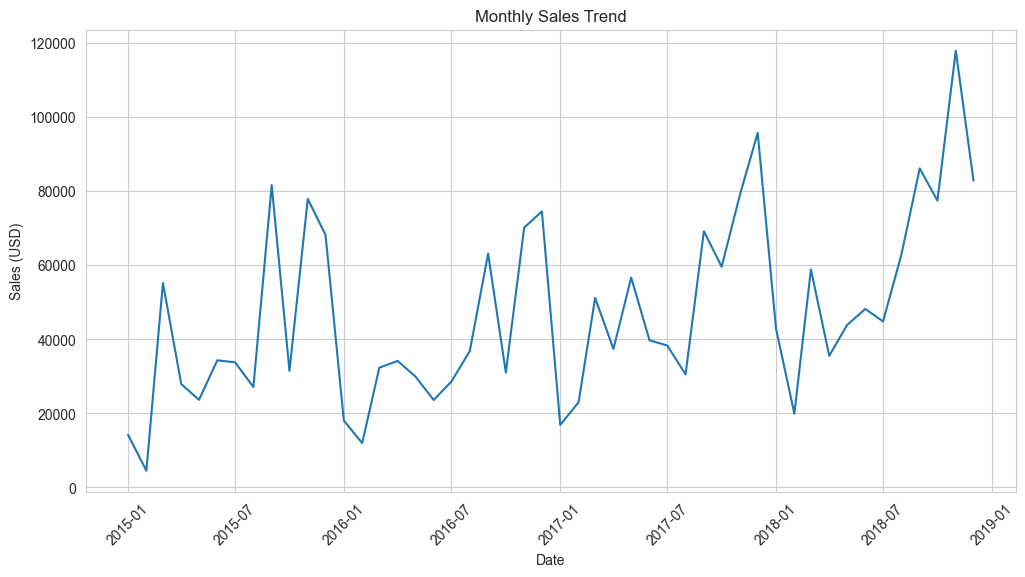

In [27]:
# Create a time column for plotting
sales_by_month['Date'] = pd.to_datetime(sales_by_month[['Year', 'Month']].assign(Day=1))
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=sales_by_month)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales (USD)')
plt.xticks(rotation=45)
plt.show()

In [28]:
# ### 5. Frequency of Categorical Variables
# Analyze the frequency of key categorical variables
print("\n### Count of orders by Category ###")
print(data['Category'].value_counts())
print("\n### Count of orders by Region ###")
print(data['Region'].value_counts())
print("\n### Count of orders by Segment ###")
print(data['Segment'].value_counts())


### Count of orders by Category ###
Category
Office Supplies    5903
Furniture          2076
Technology         1810
Name: count, dtype: int64

### Count of orders by Region ###
Region
West       3140
East       2774
Central    2277
South      1598
Name: count, dtype: int64

### Count of orders by Segment ###
Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64


In [29]:
# ### 6. Correlation Analysis
# Check correlations between numerical variables (e.g., Sales, Quantity, Discount, Profit)
# Note: Profit is not in the provided columns, so this is conditional
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("\n### Correlation matrix ###")
print(data[numerical_columns].corr())


### Correlation matrix ###
          Row ID     Sales
Row ID  1.000000 -0.000434
Sales  -0.000434  1.000000


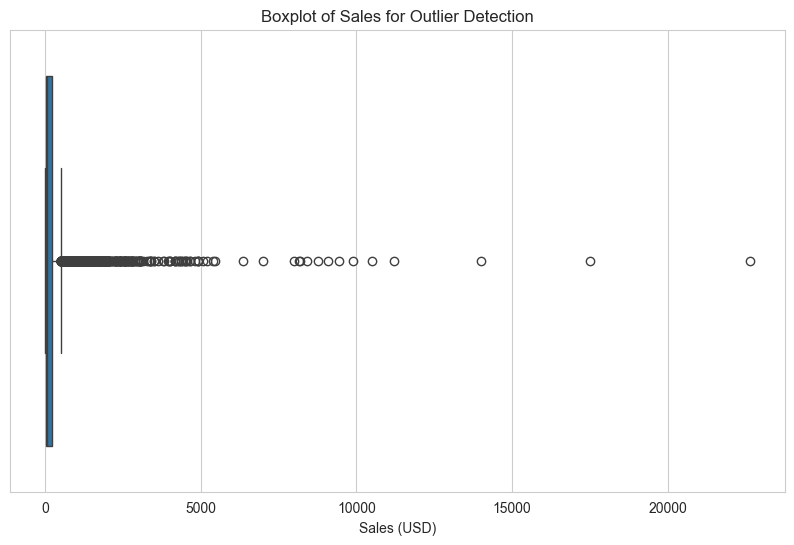

In [30]:
# ### 7. Boxplot for Outlier Detection
# Visualize potential outliers in Sales using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales', data=data)
plt.title('Boxplot of Sales for Outlier Detection')
plt.xlabel('Sales (USD)')
plt.show()

In [34]:
# ## Deeper Exploratory Data Analysis
# This section analyzes Sales by Sub-Category and Segment within each Region to identify patterns and variations across regions.

In [35]:
# ### 8. Sales by Sub-Category within Each Region
# Aggregate sales by Region and Sub-Category
sales_by_region_subcategory = data.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

In [36]:
# Create a pivot table for visualization
pivot_subcategory = sales_by_region_subcategory.pivot(index='Sub-Category', columns='Region', values='Sales').fillna(0)

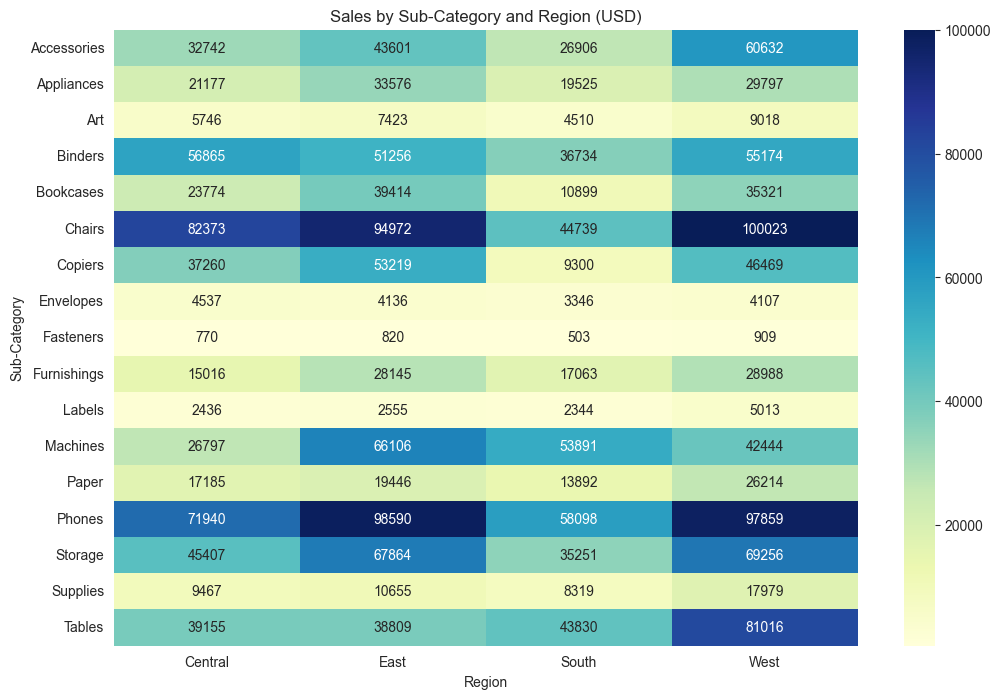

In [37]:
# Plot a heatmap to show sales distribution across regions and sub-categories
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_subcategory, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Sales by Sub-Category and Region (USD)')
plt.xlabel('Region')
plt.ylabel('Sub-Category')
plt.show()

In [38]:
# Display top 5 sub-categories per region
print("\n### Top 5 Sub-Categories by Sales per Region ###")
for region in data['Region'].unique():
    print(f"\nRegion: {region}")
    top_subcategories = sales_by_region_subcategory[sales_by_region_subcategory['Region'] == region][['Sub-Category', 'Sales']].sort_values('Sales', ascending=False).head(5)
    print(top_subcategories)


### Top 5 Sub-Categories by Sales per Region ###

Region: South
   Sub-Category      Sales
47       Phones  58098.338
45     Machines  53890.960
39       Chairs  44739.246
50       Tables  43830.212
37      Binders  36734.365

Region: West
   Sub-Category       Sales
56       Chairs  100023.200
64       Phones   97859.496
67       Tables   81016.226
65      Storage   69256.196
51  Accessories   60632.006

Region: Central
   Sub-Category      Sales
5        Chairs  82372.776
13       Phones  71939.952
3       Binders  56865.012
14      Storage  45407.440
16       Tables  39154.971

Region: East
   Sub-Category      Sales
30       Phones  98589.912
22       Chairs  94972.309
31      Storage  67864.366
28     Machines  66106.165
23      Copiers  53219.462


In [39]:
# ### 9. Sales by Segment within Each Region
# Aggregate sales by Region and Segment
sales_by_region_segment = data.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()

In [40]:
# Create a pivot table for visualization
pivot_segment = sales_by_region_segment.pivot(index='Segment', columns='Region', values='Sales').fillna(0)

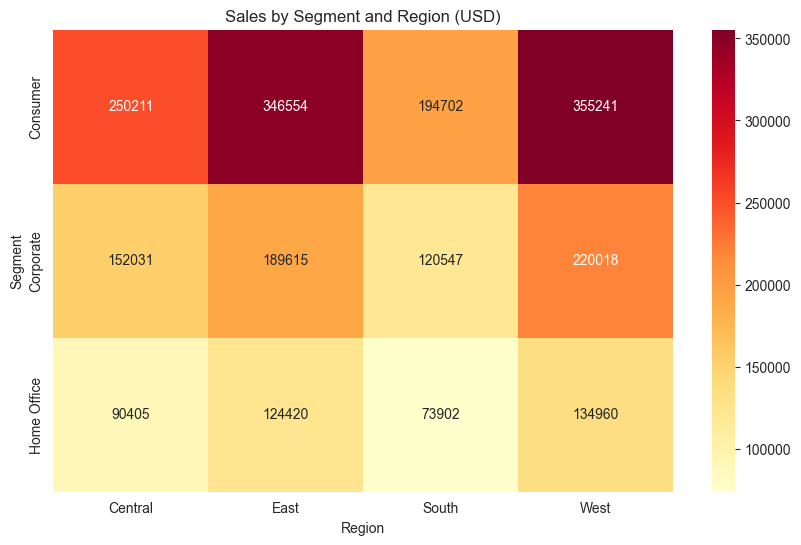

In [41]:
# Plot a heatmap to show sales distribution across regions and segments
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_segment, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title('Sales by Segment and Region (USD)')
plt.xlabel('Region')
plt.ylabel('Segment')
plt.show()

In [42]:
# Display sales by segment per region
print("\n### Sales by Segment per Region ###")
for region in data['Region'].unique():
    print(f"\nRegion: {region}")
    segment_sales = sales_by_region_segment[sales_by_region_segment['Region'] == region][['Segment', 'Sales']].sort_values('Sales', ascending=False)
    print(segment_sales)


### Sales by Segment per Region ###

Region: South
       Segment        Sales
6     Consumer  194702.2130
7    Corporate  120546.8745
8  Home Office   73902.3715

Region: West
        Segment        Sales
9      Consumer  355241.1910
10    Corporate  220018.2785
11  Home Office  134960.2150

Region: Central
       Segment        Sales
0     Consumer  250210.5220
1    Corporate  152031.4968
2  Home Office   90404.8944

Region: East
       Segment       Sales
3     Consumer  346554.225
4    Corporate  189615.185
5  Home Office  124419.946


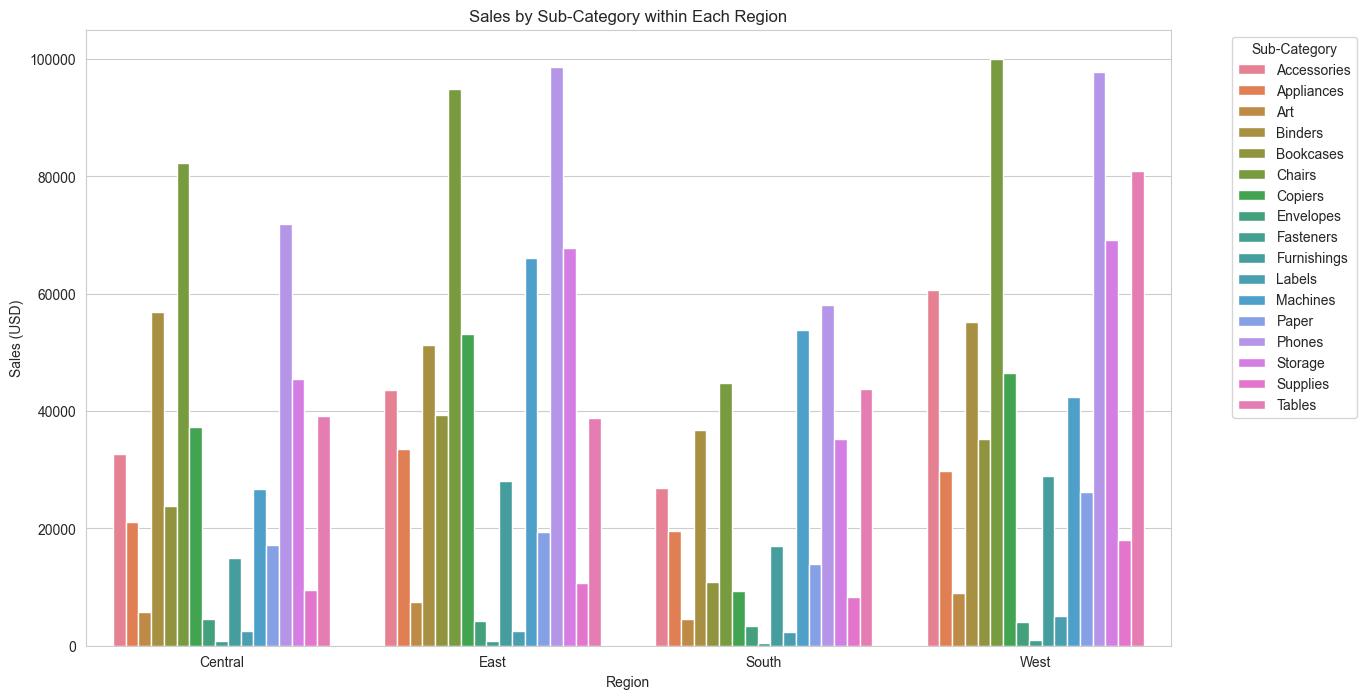

In [43]:
# ### 10. Stacked Bar Plot for Sales by Sub-Category and Region
# Plot a stacked bar chart to visualize sales contribution of sub-categories within each region
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Sales', hue='Sub-Category', data=sales_by_region_subcategory)
plt.title('Sales by Sub-Category within Each Region')
plt.xlabel('Region')
plt.ylabel('Sales (USD)')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

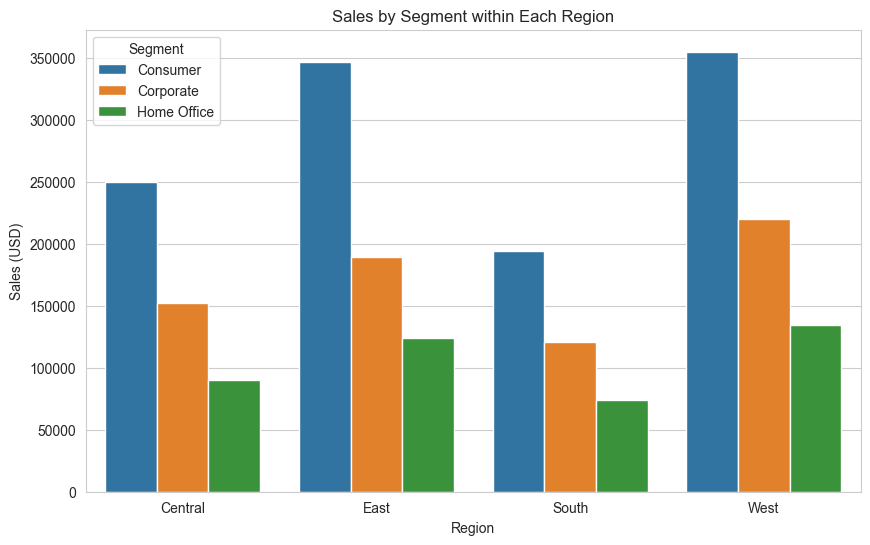

In [44]:
# ### 11. Stacked Bar Plot for Sales by Segment and Region
# Plot a stacked bar chart to visualize sales contribution of segments within each region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Segment', data=sales_by_region_segment)
plt.title('Sales by Segment within Each Region')
plt.xlabel('Region')
plt.ylabel('Sales (USD)')
plt.legend(title='Segment')
plt.show()

In [47]:
# ### 12. Sales by Sub-Category and Segment Combined
# Aggregate sales by Sub-Category and Segment to identify which customer segments drive sales in each sub-category
sales_by_subcategory_segment = data.groupby(['Sub-Category', 'Segment'])['Sales'].sum().reset_index()

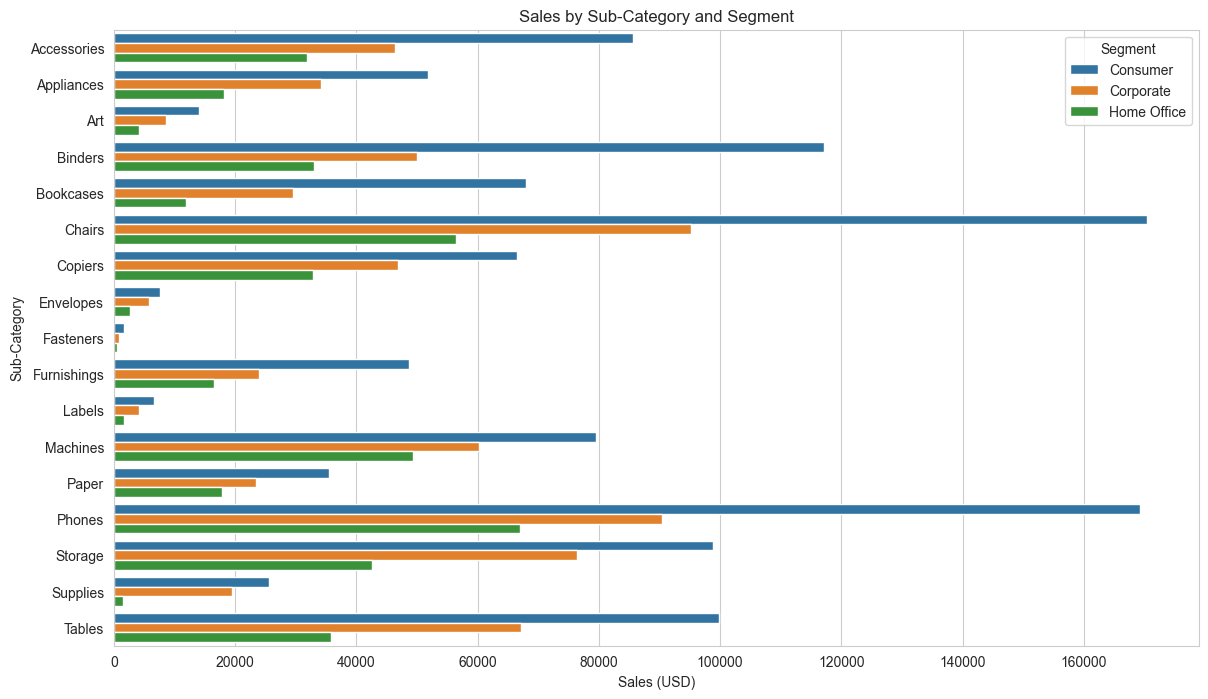

In [48]:
# Plot a bar chart to visualize sales by Sub-Category and Segment
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Sub-Category', hue='Segment', data=sales_by_subcategory_segment)
plt.title('Sales by Sub-Category and Segment')
plt.xlabel('Sales (USD)')
plt.ylabel('Sub-Category')
plt.legend(title='Segment')
plt.show()

In [49]:
# Display sales by Sub-Category and Segment
print("\n### Sales by Sub-Category and Segment ###")
print(sales_by_subcategory_segment.sort_values(['Sub-Category', 'Sales'], ascending=[True, False]))


### Sales by Sub-Category and Segment ###
   Sub-Category      Segment        Sales
0   Accessories     Consumer   85699.0740
1   Accessories    Corporate   46288.0200
2   Accessories  Home Office   31894.5960
3    Appliances     Consumer   51824.2930
4    Appliances    Corporate   34170.3730
5    Appliances  Home Office   18080.7970
6           Art     Consumer   14062.2560
7           Art    Corporate    8518.1400
8           Art  Home Office    4116.9740
9       Binders     Consumer  117091.9090
10      Binders    Corporate   50006.9870
11      Binders  Home Office   32929.8890
12    Bookcases     Consumer   67949.3970
13    Bookcases    Corporate   29601.0243
14    Bookcases  Home Office   11857.8774
15       Chairs     Consumer  170458.8960
16       Chairs    Corporate   95203.1520
17       Chairs  Home Office   56445.4830
18      Copiers     Consumer   66539.1340
19      Copiers    Corporate   46829.3860
20      Copiers  Home Office   32879.5740
21    Envelopes     Consumer    7

In [50]:
# ### 13. Seasonal Patterns by Sub-Category
# Aggregate sales by month and Sub-Category to identify seasonal patterns
sales_by_month_subcategory = data.groupby(['Month', 'Sub-Category'])['Sales'].sum().reset_index()

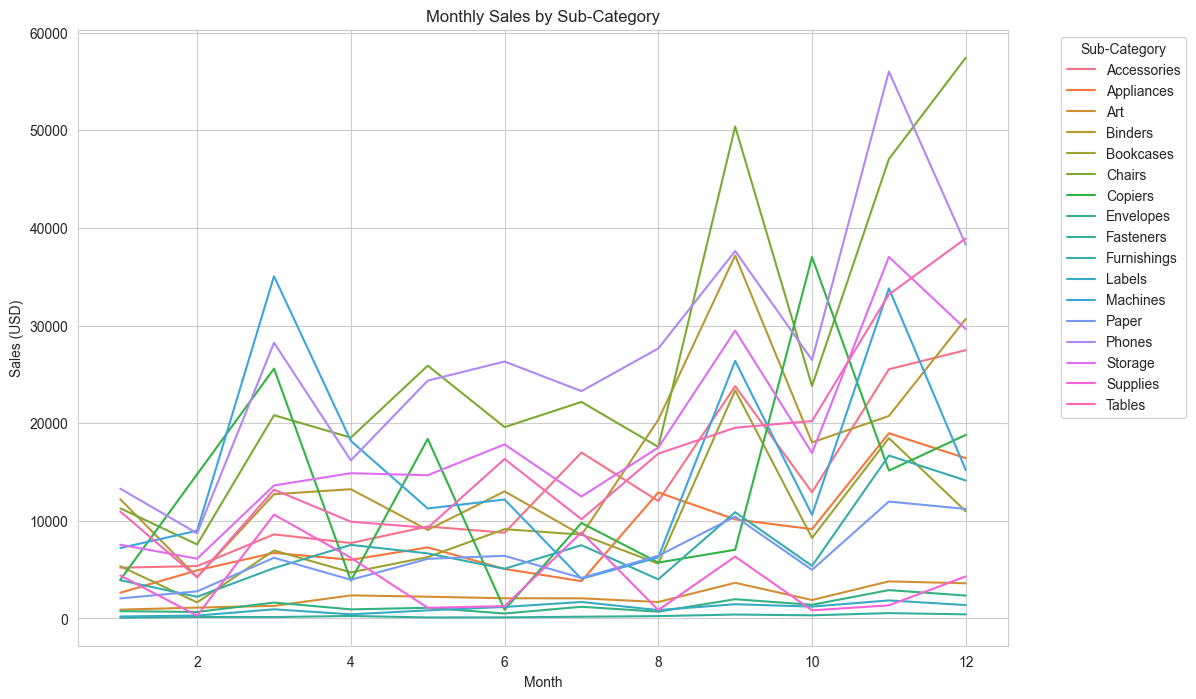

In [51]:
# Plot a line chart to show monthly sales trends by Sub-Category
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Sales', hue='Sub-Category', data=sales_by_month_subcategory)
plt.title('Monthly Sales by Sub-Category')
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [52]:
# ### 14. Seasonal Patterns by Region
# Aggregate sales by month and Region to identify regional seasonal patterns
sales_by_month_region = data.groupby(['Month', 'Region'])['Sales'].sum().reset_index()

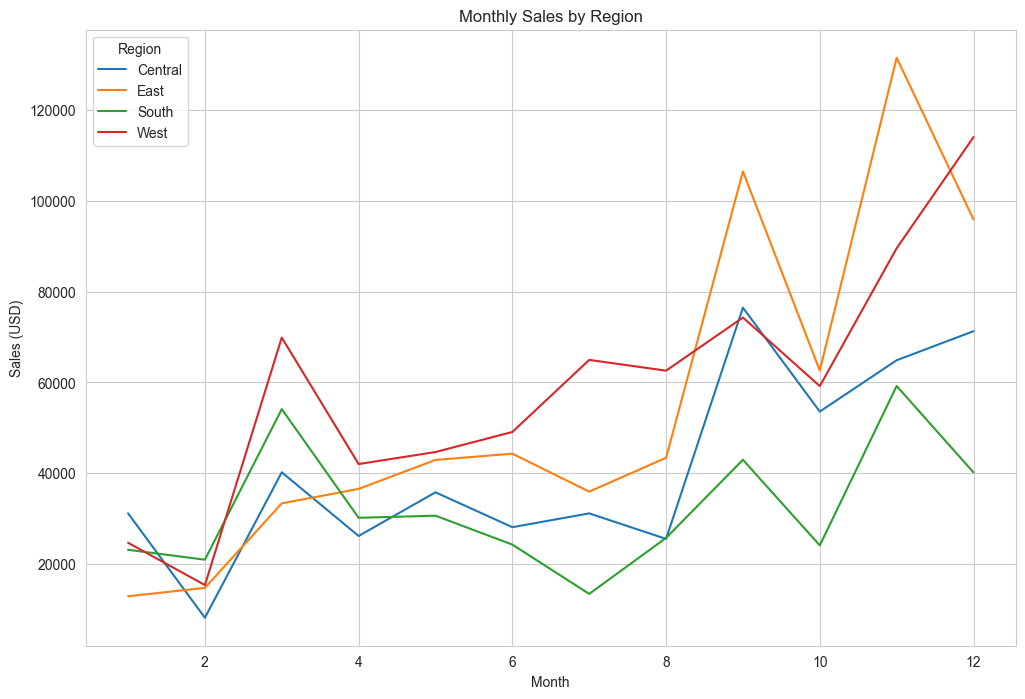

In [53]:
# Plot a line chart to show monthly sales trends by Region
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Sales', hue='Region', data=sales_by_month_region)
plt.title('Monthly Sales by Region')
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.legend(title='Region')
plt.show()

In [54]:
# ### 15. Top Products within Sub-Categories
# Identify top 5 products by sales within key sub-categories (Phones and Chairs)
top_subcategories = ['Phones', 'Chairs']
top_products = data[data['Sub-Category'].isin(top_subcategories)].groupby(['Sub-Category', 'Product Name'])['Sales'].sum().reset_index()
top_products = top_products.sort_values(['Sub-Category', 'Sales'], ascending=[True, False]).groupby('Sub-Category').head(5)

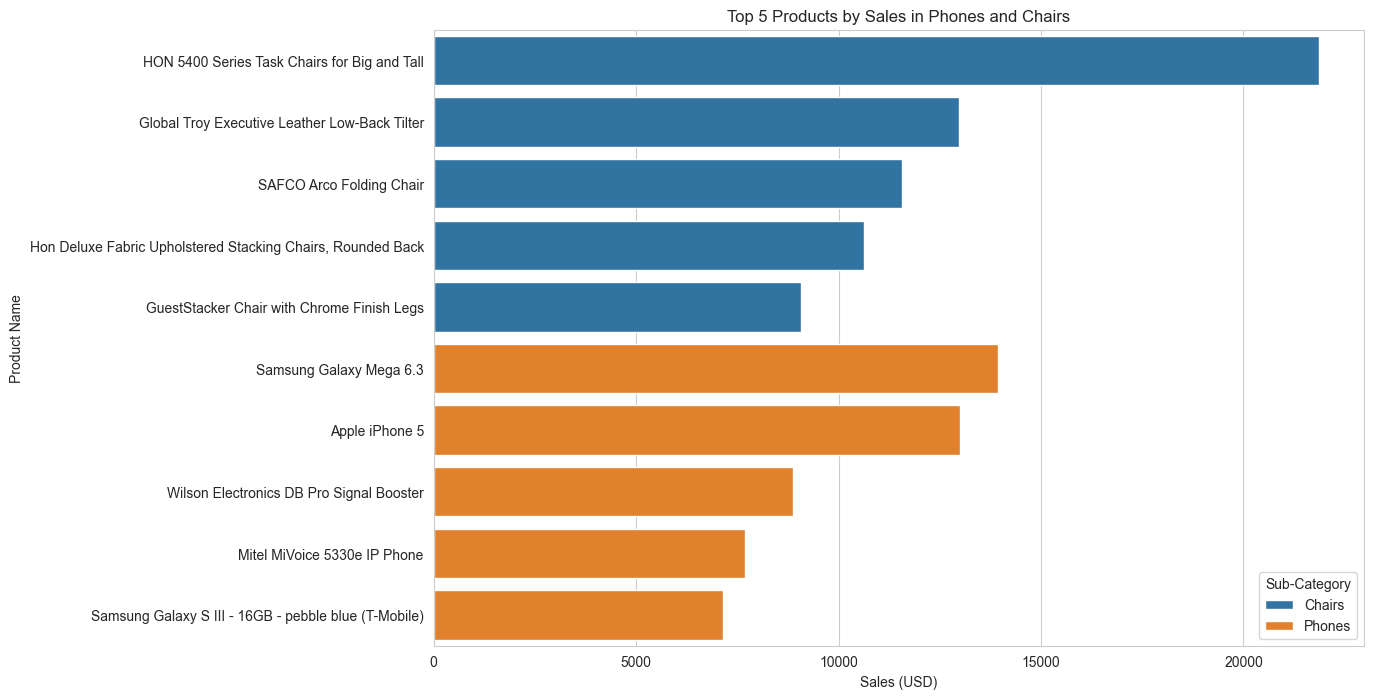

In [55]:
# Plot top products for Phones and Chairs
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Product Name', hue='Sub-Category', data=top_products)
plt.title('Top 5 Products by Sales in Phones and Chairs')
plt.xlabel('Sales (USD)')
plt.ylabel('Product Name')
plt.legend(title='Sub-Category')
plt.show()

In [56]:
# Display top products
print("\n### Top 5 Products by Sales in Phones and Chairs ###")
print(top_products)


### Top 5 Products by Sales in Phones and Chairs ###
    Sub-Category                                       Product Name      Sales
40        Chairs       HON 5400 Series Task Chairs for Big and Tall  21870.576
35        Chairs      Global Troy Executive Leather Low-Back Tilter  12975.382
82        Chairs                           SAFCO Arco Folding Chair  11572.780
50        Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  10637.528
39        Chairs         GuestStacker Chair with Chrome Finish Legs   9070.944
242       Phones                            Samsung Galaxy Mega 6.3  13943.668
108       Phones                                     Apple iPhone 5  12996.600
265       Phones           Wilson Electronics DB Pro Signal Booster   8878.400
181       Phones                       Mitel MiVoice 5330e IP Phone   7699.720
245       Phones  Samsung Galaxy S III - 16GB - pebble blue (T-M...   7139.796


In [58]:
# ### 16. Summary of Findings
# - **Sales by Sub-Category and Region**:
#   - Phones and Chairs are the top-performing sub-categories across all regions, with West showing the highest sales for Chairs (~100,000 USD) and Phones (~97,859 USD).
#   - East has strong sales in Copiers (~53,219 USD), which is unique compared to other regions.
#   - South has the lowest overall sales, with Machines (~53,891 USD) and Tables (~43,830 USD) among its top sub-categories.
#   - Accessories and Storage are significant in West and Central, but less so in South.

# - **Sales by Segment and Region**:
#   - The Consumer segment dominates in all regions, contributing the highest sales (e.g., ~355,241 USD in West, ~346,554 USD in East).
#   - Corporate and Home Office segments follow, with West and East showing higher absolute sales than South and Central.
#   - South has the lowest sales across all segments, with Consumer at ~194,702 USD.

# - **Key Observations**:
#   - West and East are the strongest regions in terms of total sales, likely due to larger markets or higher demand.
#   - Sub-category preferences vary by region, with Copiers and Machines more prominent in East and South, respectively.
#   - The Consumer segment is the primary driver of sales, but Corporate and Home Office contribute significantly in stronger regions like West and East.

#- **Sales by Sub-Category and Segment**:
#  - The Consumer segment drives the highest sales across most sub-categories, particularly for Chairs (~$170,459) and Phones (~$169,231), reflecting strong retail demand.
#  - Corporate and Home Office segments show lower sales, with Corporate notable in Phones (~$90,343) and Chairs (~$95,203), indicating business-focused purchases.
#  - Sub-Categories like Fasteners, Labels, and Envelopes have minimal sales, especially in Home Office segment (<$2,700 USD), suggesting low demand or niche use.
#  - Technology (e.g., Phones, Machines) and Furniture (e.g., Chairs, Tables) sub-categories outperform Office Supplies in all segments.

#- **Seasonal Patterns by Sub-Category**:
#  - Most sub-categories exhibit sales peaks in March, September, and November, likely tied to business cycles (e.g., Q1 planning, fiscal year-end, holiday season).
#  - Phones peak in November (~$5,600), indicating strong holiday demand for technology products.
#  - Chairs show a significant peak in September (~$5,000), possibly linked to office setups or back-to-school seasons.
#  - Machines and Envelopes peak in March, suggesting early-year business needs for equipment or supplies.

#- **Seasonal Patterns by Region**:
#  - All regions share sales peaks in March, April, and October, reflecting common market trends like fiscal year starts and holiday shopping.
#  - Central and West have additional peaks in May, July, or December, indicating more active markets compared to East and South.
#  - South shows a unique peak in October, suggesting regional differences in demand or promotional activities.

#- **Top Products in Phones and Chairs**:
#  - In Chairs, the "HON 5400 Series Task Chairs for Big and Tall" leads with ~$21,771 in sales, followed by premium products like "Global Troy Executive" (~$13,975), indicating demand for ergonomic or high-end office furniture.
#  - In Phones, "Samsung Galaxy Mega 6.3" (~$13,944) and "Apple iPhone 5" (~$12,996) are top performers, highlighting popularity of high-end smartphones.
#  - Top products in both sub-categories are high-value items, suggesting large orders or business purchases drive sales.

In [59]:
# ## Key Performance Indicators (KPIs)
# This section calculates business-relevant KPIs to summarize sales performance and provide actionable insights.

In [60]:
# ### 1. Total Sales
# Calculate the total sales across the dataset
total_sales = data['Sales'].sum()

print("\n### Total Sales ###")
print(f"Total Sales: ${total_sales:,.2f}")


### Total Sales ###
Total Sales: $2,252,607.41


In [61]:
# ### 2. Average Order Value (AOV)
# Calculate the average order value by dividing total sales by the number of unique orders
num_orders = data['Order ID'].nunique()
average_order_value = total_sales / num_orders

print("\n### Average Order Value ###")
print(f"Average Order Value: ${average_order_value:,.2f}")


### Average Order Value ###
Average Order Value: $458.22


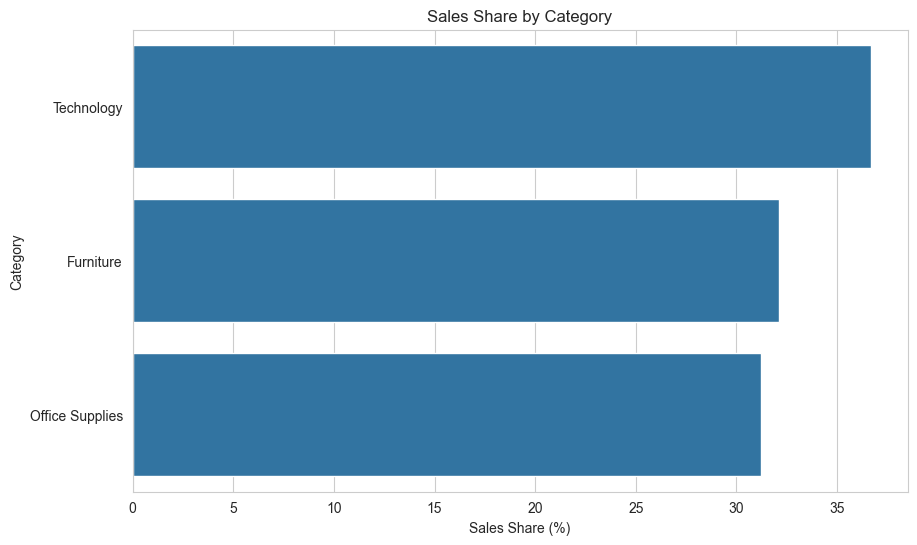


### Sales Share by Category ###
          Category        Sales  Sales Share (%)
2       Technology  825856.1130        36.662230
0        Furniture  723538.4757        32.120043
1  Office Supplies  703212.8240        31.217727


In [62]:
# ### 3. Sales Share by Category
# Calculate the sales share (percentage) for each product category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
sales_by_category['Sales Share (%)'] = (sales_by_category['Sales'] / total_sales) * 100

# Plot sales share by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Share (%)', y='Category', data=sales_by_category.sort_values('Sales Share (%)', ascending=False))
plt.title('Sales Share by Category')
plt.xlabel('Sales Share (%)')
plt.ylabel('Category')
plt.show()

print("\n### Sales Share by Category ###")
print(sales_by_category.sort_values('Sales', ascending=False))

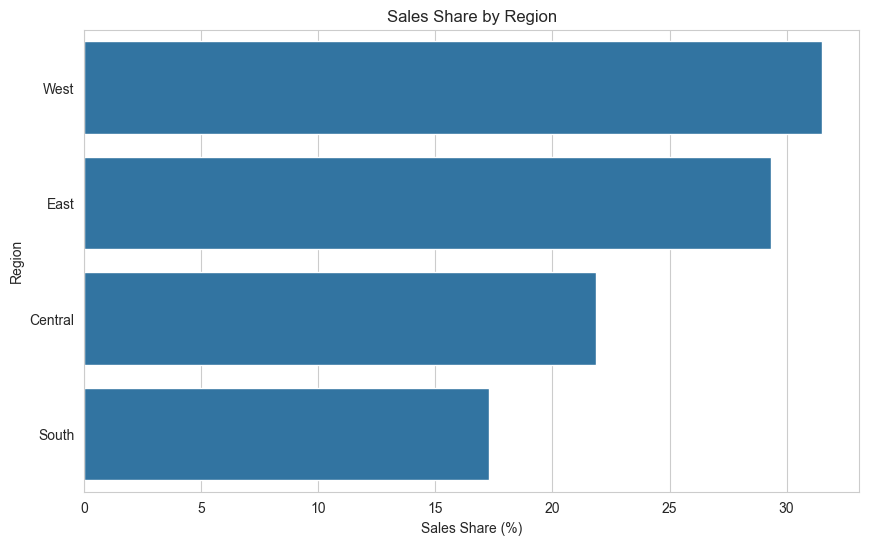


### Sales Share by Region ###
    Region        Sales  Sales Share (%)
3     West  710219.6845        31.528782
1     East  660589.3560        29.325543
0  Central  492646.9132        21.870074
2    South  389151.4590        17.275601


In [63]:
# ### 4. Sales Share by Region
# Calculate the sales share (percentage) for each region
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
sales_by_region['Sales Share (%)'] = (sales_by_region['Sales'] / total_sales) * 100

# Plot sales share by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Share (%)', y='Region', data=sales_by_region.sort_values('Sales Share (%)', ascending=False))
plt.title('Sales Share by Region')
plt.xlabel('Sales Share (%)')
plt.ylabel('Region')
plt.show()

print("\n### Sales Share by Region ###")
print(sales_by_region.sort_values('Sales', ascending=False))

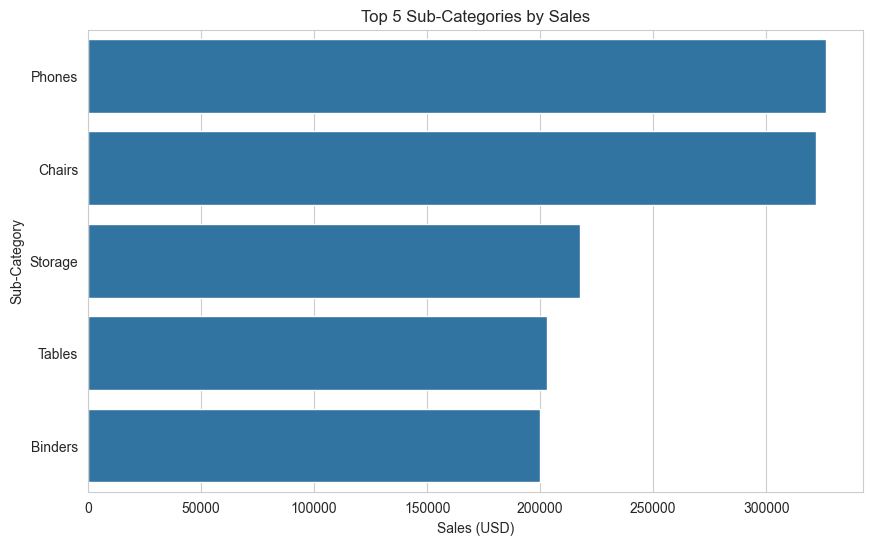


### Top 5 Sub-Categories by Sales ###
   Sub-Category       Sales
13       Phones  326487.698
5        Chairs  322107.531
14      Storage  217779.102
16       Tables  202810.628
3       Binders  200028.785


In [64]:
# ### 5. Top 5 Sub-Categories by Sales
# Identify the top 5 sub-categories by total sales
top_subcategories = data.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(5)

# Plot top 5 sub-categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Sub-Category', data=top_subcategories)
plt.title('Top 5 Sub-Categories by Sales')
plt.xlabel('Sales (USD)')
plt.ylabel('Sub-Category')
plt.show()

print("\n### Top 5 Sub-Categories by Sales ###")
print(top_subcategories)

In [65]:
## KPI Findings
#- **Total Sales**:
#  - Total sales amount to approximately $2.25 million, indicating a robust sales performance over the analyzed period (2015–2018).
#  - This metric provides a baseline for evaluating sales distribution and growth opportunities.

#- **Average Order Value (AOV)**:
#  - The average order value is ~$458, suggesting customers purchase high-value items (e.g., Phones, Chairs) or multiple products per order.
#  - A relatively high AOV reflects a mix of small and large orders, with potential for upselling strategies.

#- **Sales Share by Category**:
#  - Technology leads with ~36.7% of total sales ($825,856), followed closely by Furniture (~32.1%, $723,538) and Office Supplies (~31.2%, $703,213).
#  - The dominance of Technology highlights strong demand for high-value products, while Office Supplies contribute less despite frequent orders.

#- **Sales Share by Region**:
#  - West accounts for ~31.5% of sales ($710,220), followed by East (~29.3%, $660,589), Central (~21.9%, $492,647), and South (~17.3%, $389,151).
#  - West and East together drive over 60% of sales, underscoring their market strength, while South presents growth potential due to its lower share.

#- **Top 5 Sub-Categories by Sales**:
#  - Phones (~$326,488) and Chairs (~$322,108) are the top revenue-generating sub-categories, reinforcing their importance across regions and segments.
#  - Storage (~$217,779), Tables (~$202,811), and Binders (~$200,029) follow, with Technology and Furniture sub-categories outperforming Office Supplies.
#  - The focus on Phones and Chairs suggests high demand for premium or business-oriented products.

In [66]:
# ### Export Cleaned Dataset as CSV
data.to_csv('superstore_cleaned.csv', index=False)
print("Cleaned dataset exported as 'superstore_cleaned.csv'")

Cleaned dataset exported as 'superstore_cleaned.csv'
